In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Gradient Descent

In this exercise, you will create the necessary functions to go through the steps of a single Gradient Descent Epoch. You will then combine the functions and create a loop through the entire Gradient Descent procedure.

## 1. Data Exploration

We will import for you the following dataset of ingredients with their mineral content

In [57]:
data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/04-Under-the-Hood/gradient_descent_ingredients_zinc_phosphorous.csv")
data.head()

,aliment,zinc,phosphorus
0,Durum wheat pre-cooked. whole grain. cooked. u...,0.120907,0.193784
1,Asian noodles. plain. cooked. unsalted,0.047859,0.060329
2,Rice. brown. cooked. unsalted,0.156171,0.201097
3,Rice. cooked. unsalted,0.065491,0.045704
4,Rice. parboiled. cooked. unsalted,0.025189,0.045704


👇 We can visualize a somewhat Linear relationship between the `Phosphorus` and `Zinc`.   

Let's use Gradient Descent to find the line of best fit between them! 

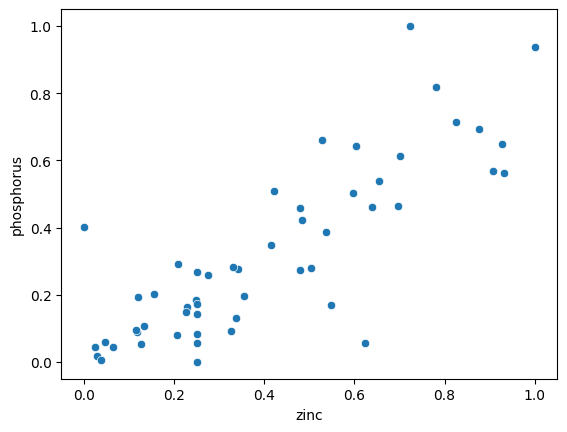

In [58]:
import seaborn as sns

sns.scatterplot(data=data, x='zinc', y='phosphorus');

❓ Create the two `np.Array`
- `data_X` for zinc
- `data_Y` for phosphorus

In [59]:
data_X = np.array(data['zinc'])
data_Y = np.array(data['phosphorus'])
data_X, data_Y

(array([0.1209068 , 0.04785894, 0.15617128, 0.06549118, 0.02518892,
        0.25188917, 0.33753149, 0.20654912, 0.22921914, 0.27455919,
        0.0302267 , 0.22670025, 0.62468514, 0.11838791, 0.25188917,
        0.13350126, 0.11586902, 0.24937028, 0.03778338, 0.25188917,
        0.12594458, 0.25188917, 0.82619647, 0.92695214, 0.65491184,
        0.41561713, 0.87657431, 0.        , 0.35516373, 0.34256927,
        0.50377834, 0.93198992, 0.52896725, 0.47858942, 1.        ,
        0.697733  , 0.53652393, 0.63979849, 0.78085642, 0.72292191,
        0.42065491, 0.60453401, 0.70025189, 0.54911839, 0.25188917,
        0.20906801, 0.59697733, 0.32997481, 0.4836272 , 0.47858942,
        0.32745592, 0.25188917, 0.90680101]),
 array([0.19378428, 0.06032907, 0.20109689, 0.04570384, 0.04570384,
        0.26691042, 0.13162706, 0.08043876, 0.16453382, 0.25959781,
        0.01828154, 0.14990859, 0.05484461, 0.08957952, 0.14259598,
        0.10603291, 0.09506399, 0.18281536, 0.00548446, 0.        ,
  

In [60]:
assert (data_X.shape == (53,))
assert (data_Y.shape == (53,))

## 2. Code one Epoch

In this section of the exercise, you will define the key functions used to update the parameters during one epoch $\color {red}{(k)}$ of gradient descent. Recall the formula below

$$
\beta_0^{\color {red}{(k+1)}} = \beta_0^{\color {red}{(k)}} - \eta \frac{\partial L}{\partial \beta_0}(\beta^{\color{red}{(k)}})
$$


$$
\beta_1^{\color {red}{(k+1)}} = \beta_1^{\color {red}{(k)}} - \eta \frac{\partial L}{\partial \beta_1}(\beta^{\color {red}{(k)}})
$$


### 2.1 Hypothesis Function

$$
\hat{y} =  a x + b
$$

❓ Define the hypothesis function of a Linear Regression. Let `a` be the slope and `b` the intercept.


In [61]:
def h(X,a,b):
    return a * X + b

### 2.2 Loss Function

$$
Sum\ Squares\ Loss = \sum_{i=0}^n (y^{(i)} - \hat{y}^{(i)} )^2
$$

❓ Define the SSR Loss Function for the Hypothesis Function using the equation above. Reuse the function `h` coded above when writing your new function.


In [62]:
def loss(X,Y,a,b):
    return np.sum((Y - h(X, a, b)) ** 2)

❓ What would be the total Loss computed on all our ingredients dataset if:
- a = 1 
- b = 1

In [63]:
a = 1
b = 1

In [64]:
total_loss = loss(data_X, data_Y, a, b)
total_loss

63.868506986115456

⚠️ You should be getting 63.86. If not, something is wrong with your function. Fix it before moving on!

### 2.3 Gradient

$$
\frac{d\ SSR}{d\ slope}= \sum_{i=0}^n -2  x_i (y^{(i)} - \hat{y}^{(i)} )
$$

$$
\frac{d\ SSR}{d\ intercept}= \sum_{i=0}^n -2(y^{(i)} - \hat{y}^{(i)} ) 
$$

❓ Define a function to compute the partial derivatives of the Loss Function relative to parameter `a` and `b` at a given point.


<details>
<summary>💡 Hint</summary>
Again, you must re-use the Hypothesis Function in your new function to compute the predictions at given points.
</details>

In [65]:
def gradient(X,Y,a,b):
    errors = Y - h(X, a, b)
    d_a = -2 * np.sum(X * errors)
    d_b = -2 * np.sum(errors)
    return d_a, d_b

❓ Using your function, what would be the partial derivatives of each parameter if:
- a = 1
- b = 1

In [66]:
d_a, d_b = gradient(data_X, data_Y, a, b)
d_a, d_b

(48.459065809109006, 115.17923733301406)

⚠️ You should be getting 48.45 and  115.17. If not, fix your function!

### 2.4 Step Sizes

$$
step\ size = gradient \cdot learning\ rate
$$

❓ Define a function that calculates the step sizes alongside each parameter (`a`,`b`), according to their derivatives (`d_a`, `d_b`) and a `learning_rate` equal to `0.01` by default

In [67]:
def steps(d_a,d_b, learning_rate = 0.01):
    return d_a * learning_rate, d_b * learning_rate

❓ What would be the steps (`step_a`, `step_b`) to take for the derivatives computed above for (`a`,`b`) = (1,1)?

In [68]:
step_a, step_b = steps(d_a, d_b)
step_a, step_b

(0.4845906580910901, 1.1517923733301405)

⚠️ The steps should be 0.48 for `a` and 1.15 for `b`

### 2.5 Update parameters (a, b)

$$
updated\ parameter = old\ parameter\ value - step\ size
$$

❓ Define a function that computes the updated parameter values from the old parameter values and the step sizes.

In [69]:
def update_params(a, b, step_a, step_b):
    return a - step_a, b - step_b

### 2.6 One full epoch

❓ Using the functions you just created, compute the updated parameters at the end of the first Epoch, had you started with parameters:
- a = 1
- b = 1

In [70]:
a_new, b_new = update_params(a, b, step_a, step_b)
a_new, b_new

(0.5154093419089099, -0.1517923733301405)

⚠️ You should be getting the following values:
   - updated_a = 0.51
   - updated_b = -0.15

## 3. Gradient Descent

❓ Now that you have the necessary functions for a Gradient Descent, loop through epochs until convergence.

- Initialize parameters `a = 1` and  `b = 1`
- Consider convergence to be **100 epochs**
- Don't forget to start each new epoch with the updated parameters
- Append the values for `loss`, `a`, and `b` at each epoch to their corresponding lists called `loss_history`, `a_history` and `b_history`

In [45]:
epochs = 100

loss_history = []
a_history = []
b_history = []

for epoch in range(epochs):
    c_loss = loss(data_X, data_Y, a, b)
    d_a, d_b = gradient(data_X, data_Y, a, b)
    step_a, step_b = steps(d_a, d_b)
    a, b = update_params(a, b, step_a, step_b)
    
    loss_history.append(c_loss)
    a_history.append(a)
    b_history.append(b)  


❓ What are the parameter values at the end of the 100 epochs? Save them to respective variables `a_100` and `b_100` 

In [46]:
a_100 = a
b_100 = b

In [47]:
# 🧪 Test your code
from nbresult import ChallengeResult
result = ChallengeResult('descent',
                         a_100=a_100,
                         b_100=b_100)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /root/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /root/code/MonicaVenzor/05-ML/04-Under-the-hood/data-batch-gradient-descent/tests
plugins: anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 2 items

test_descent.py::TestDescent::test_a PASSED                              [ 50%]
test_descent.py::TestDescent::test_b PASSED                              [100%]

============================== 2 passed in 0.09s ===============================


💯 You can commit your code:

git add tests/descent.pickle

git commit -m 'Completed descent step'

git push origin master



## 4. Visual check

❓ Wrap this iterative approach into a method `gradient_descent()` which returns your `new_a`, `new_b` and `history`, a dictionary containing these lists: 
- `loss_history`
- `a_history`
- `b_history`

In [48]:
def gradient_descent(X, Y, a_init=1, b_init=1, learning_rate=0.001, n_epochs=100):
    a, b = a_init, b_init
    loss_history = []
    a_history = []
    b_history = []
    
    for epoch in range(epochs):
        c_loss = loss(data_X, data_Y, a, b)
        d_a, d_b = gradient(data_X, data_Y, a, b)
        step_a, step_b = steps(d_a, d_b)
        a, b = update_params(a, b, step_a, step_b)
    
        loss_history.append(c_loss)
        a_history.append(a)
        b_history.append(b) 
    
    history = {
        'loss_history': loss_history,
        'a_history': a_history,
        'b_history': b_history
    }
    
    return a, b, history

❓ Plot the line of best fit through Zinc and Phosphorus using the parameters of your Gradient Descent.

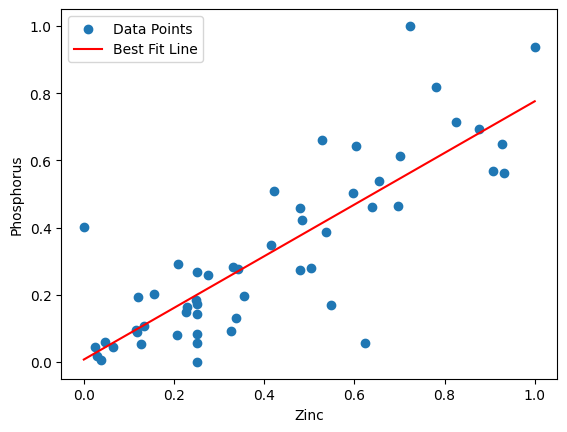

In [52]:
a_final, b_final, history = gradient_descent(data_X, data_Y)
plt.scatter(data_X, data_Y, label="Data Points")
plt.xlabel("Zinc")
plt.ylabel("Phosphorus")

x_values = np.linspace(min(data_X), max(data_X), 100)
y_values = a_final * x_values + b_final
plt.plot(x_values, y_values, color='red', label="Best Fit Line")

plt.legend()

## 5. Visualize your descent

🎯 Our goal is to plot our loss function and the gradient descent steps on a 2D surface using matplotlib's `contourf`

❓ Start by creating the data we need for the plot
- `range_a`: a range of 100 values for `a` equally spaced between -1 and 1
- `range_b`: a range of 100 values for `b` equally spaced between -1 and 1 
- `Z`: a 2D-array where each element `Z[j,i]` is equal to the value of the loss function at `a` = `range_a[i]` and `b` = `range_b[j]`

In [53]:
range_a = np.linspace(-1, 1, 100)
range_b = np.linspace(-1, 1, 100)
Z = np.zeros((len(range_b), len(range_a)))
for i in range(len(range_a)):
    for j in range(len(range_b)):
        Z[j, i] = loss(data_X, data_Y, range_a[i], range_b[j])

❓ Now, plot in one single subplot:
- your loss function as a 2D-surface using matplotlib [contourf](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html) with 3 parameters
- all historical (a,b) points as a scatterplot with red dots to visualize your gradient descent!

Change your learning rate and observe its impact on the graph!

In [23]:
# YOUR CODE HERE

❓ [optional] What about 3D? Try to plot the same data on a [plot.ly 3D contour plot](https://plotly.com/python/3d-surface-plots/) below

In [24]:
import plotly.graph_objects as go

surface = go.Surface(x=range_a, y=range_b, z=Z)
scatter = go.Scatter3d(x=history['a'], y=history['b'], z=history['loss'], mode='markers')
fig = go.Figure(data=[surface, scatter])

#fig.update_layout(title='Loss Function', autosize=False, width=500, height=500)
fig.show()

NameError: name 'range_a' is not defined

❓ Plot the history of the `loss` values as a function of the number of `epochs`. Try with multiple variations of `learning_rate` from 0.001 to 0.01 and make sure to understand the difference

In [ ]:
# YOUR CODE HERE

## 6. With Sklearn...

❓ Using Sklearn, train a Linear Regression model on the same data. Compare its parameters to the ones computed by your Gradient Descent.

In [ ]:
# YOUR CODE HERE

They should be almost identical!

### 🏁 Congratulation! Please, push your exercise when you are done